<a href="https://colab.research.google.com/github/venkatesh-eranti/MNIST_PCA/blob/main/MNIST_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The MNIST database of handwritten digits, available from [this page](http://yann.lecun.com/exdb/mnist/), has a training set of 60,000 examples, and a test set of 10,000 examples. It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image.<br>
It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting.

# Importing required libraries

In [178]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,plot_confusion_matrix
from sklearn.decomposition import PCA

# loading & understanding the data

In [179]:
data='https://raw.githubusercontent.com/venkatesh-eranti/MNIST_PCA/main/train.csv?token=APAPOG6QWNS5Q5GGPDBZREK7YSMS6'

In [180]:
df=pd.read_csv(data)

In [181]:
df.shape

(6304, 785)

finding missing values

In [182]:
(df.isna().sum()).sum()

114

filling missing values as 0

In [183]:
df=df.fillna(0)

In [184]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [185]:
df.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,6304.000000,6304.0,6304.0,6304.0,6304.0,6304.0,6304.0,6304.0,6304.0,6304.0,6304.0,6304.0,6304.0,6304.0,6304.0,6304.0,6304.0,6304.0,6304.0,6304.0,6304.0,6304.0,6304.0,6304.0,6304.0,6304.0,6304.0,6304.0,6304.0,6304.0,6304.0,6304.0,6304.0,6304.0,6304.0,6304.000000,6304.000000,6304.000000,6304.000000,6304.000000,...,6304.000000,6304.00000,6304.000000,6304.000000,6304.000000,6304.000000,6304.000000,6304.000000,6304.0,6304.0,6304.0,6304.0,6304.0,6304.0,6304.0,6304.0,6304.0,6304.000000,6304.000000,6304.00000,6304.000000,6304.000000,6304.000000,6304.000000,6304.000000,6304.000000,6304.000000,6304.000000,6304.000000,6304.000000,6304.000000,6304.000000,6304.000000,6304.0,6304.0,6304.0,6304.0,6304.0,6304.0,6304.0
mean,4.440355,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.013484,0.040609,0.059169,0.070749,0.099619,...,3.632614,2.59835,1.785692,1.202411,0.636421,0.212722,0.131980,0.046161,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.040926,0.129124,0.13198,0.091053,0.036802,0.223192,0.451142,0.630869,0.616275,0.719860,0.463674,0.340102,0.182107,0.139594,0.142291,0.026967,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,2.885613,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.070560,3.186707,3.399072,2.710485,4.306875,...,26.087270,21.98712,18.529331,15.394097,11.226532,5.977133,4.991222,2.567989,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.451479,4.960400,4.89049,3.818958,1.724913,6.093915,9.209041,11.200040,10.073810,11.523027,9.189576,8.164333,5.676690,5.099940,5.531089,1.675547,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000

From a header and the describe of the data, we can see that the data has a label column with what digit was created, and the pixels for each part of the image are the features. The values for the pixels are between 0 and 255.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


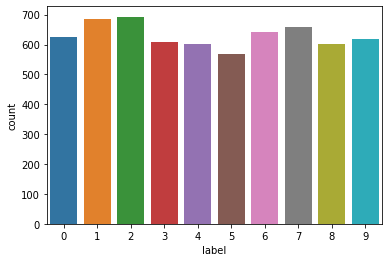

In [186]:
sns.countplot(df['label'])

In [187]:
X=df.drop('label',axis=1)
y=df['label']

# visualisaing the images

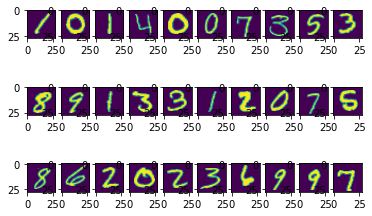

In [188]:
for i in range(0,30):
    plt.subplot(30/10,10,i+1)
    mat_data = X.iloc[i].values.reshape(28,28)  #reshape images
    plt.imshow(mat_data) #plot the data

In [189]:
 def show_image(n):
    for i in range(0,n):
        plt.subplot(n/10,10,i+1)
        mat_data = X.iloc[i].values.reshape(28,28)  #reshape images
        plt.imshow(mat_data) #plot the data
        plt.xticks([])
        plt.yticks([])

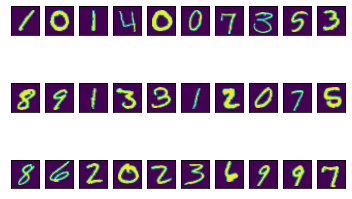

In [190]:
show_image(30)

to see first 50 numbers of any digits

In [191]:
 def show_digit_image(n):
    index=np.where(y==n)
    for i in range(0,50):
        plt.subplot(5,10,i+1)
        mat_data = X.iloc[index[0][i]].values.reshape(28,28)  #reshape images
        plt.imshow(mat_data) #plot the data
        plt.xticks([])
        plt.yticks([])

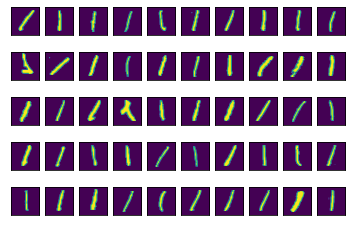

In [192]:
show_digit_image(1)

# splitting the data in to train and test

In [193]:
x_train,x_test,y_train,y_test=train_test_split(X,y,random_state=42,train_size=0.7)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((4412, 784), (1892, 784), (4412,), (1892,))

Let's create a simple model to predict the values of the images using all of the data.

# fitting classification model

In [194]:
clf=RandomForestClassifier()

In [195]:
clf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [196]:
y_pred=clf.predict(x_test)

In [197]:
accuracy_score(y_test,y_pred)

0.9371035940803383

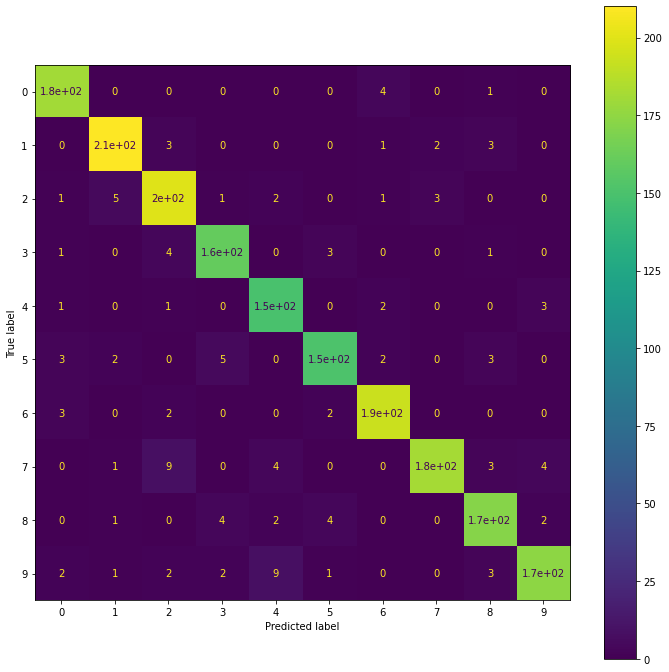

In [198]:
fig,ax=plt.subplots(figsize=(12,12))
plot_confusion_matrix(clf,x_test,y_test,ax=ax);

The above model does pretty well on the test set using all of the data. <br> let's see how well a model can do with a much lower number of features. Perhaps, we can do as well or better by reducing the noise in the original features.

# scaling the model

In [199]:
scaler=StandardScaler()
scaled_x=scaler.fit_transform(X)
scaled_x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

# fitting PCA

In [200]:
pca=PCA(n_components=2).fit(scaled_x)
scaled_x_pca=pca.transform(scaled_x)
scaled_x_pca

array([[-4.99547748, -5.87614557],
       [19.15852639,  6.30624524],
       [-7.55158765, -2.22519481],
       ...,
       [-7.94002396,  3.48697191],
       [18.95579471,  1.12819472],
       [-1.47926923,  3.79813934]])

In [201]:
scaled_pca_x_train,scaled_pca_x_test,scaled_pca_y_train,scaled_pca_y_test=train_test_split(scaled_x_pca,y,train_size=0.7,random_state=42)

In [202]:
clf_pca=RandomForestClassifier()
clf_pca.fit(scaled_pca_x_train,scaled_pca_y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [203]:
scaled_pca_y_pred=clf_pca.predict(scaled_pca_x_test)

In [204]:
accuracy_score(scaled_pca_y_test,scaled_pca_y_pred)

0.3477801268498943

In [205]:
scaled_x_pca.shape

(6304, 2)

clearly only two components isn't giving us enough information to identify the digits

In [213]:
for i in range(2,20):
    pca=PCA(n_components=i).fit(scaled_x)
    scaled_x_pca=pca.transform(scaled_x)
    scaled_pca_x_train,scaled_pca_x_test,scaled_pca_y_train,scaled_pca_y_test=train_test_split(scaled_x_pca,y,train_size=0.7,random_state=42)
    clf_pca=RandomForestClassifier()
    clf_pca.fit(scaled_pca_x_train,scaled_pca_y_train)
    scaled_pca_y_pred=clf_pca.predict(scaled_pca_x_test)
    print(f'with {i} components,the accuracy score is:',accuracy_score(scaled_pca_y_test,scaled_pca_y_pred))

with 2 components,the accuracy score is: 0.34619450317124734
with 3 components,the accuracy score is: 0.5216701902748414
with 4 components,the accuracy score is: 0.6744186046511628
with 5 components,the accuracy score is: 0.7293868921775899
with 6 components,the accuracy score is: 0.7959830866807611
with 7 components,the accuracy score is: 0.806553911205074
with 8 components,the accuracy score is: 0.8472515856236786
with 9 components,the accuracy score is: 0.8535940803382663
with 10 components,the accuracy score is: 0.861522198731501
with 11 components,the accuracy score is: 0.8668076109936576
with 12 components,the accuracy score is: 0.8678646934460887
with 13 components,the accuracy score is: 0.86892177589852
with 14 components,the accuracy score is: 0.8800211416490487
with 15 components,the accuracy score is: 0.8900634249471459
with 16 components,the accuracy score is: 0.8879492600422833
with 17 components,the accuracy score is: 0.8863636363636364
with 18 components,the accuracy sco

# visualising a row

([], <a list of 0 Text major ticklabel objects>)

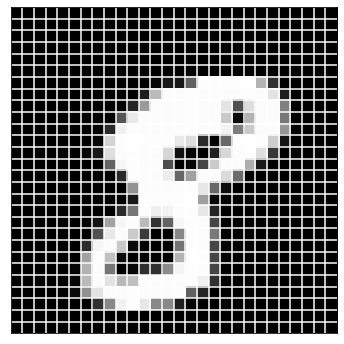

In [217]:
digit = df.iloc[10,1:].values.reshape(28,28)
plt.figure(figsize=[6,6])
plt.imshow(digit, cmap='gray'); #plot the data
plt.hlines(np.arange(-0.5, 27.5), -.5, 27.5, colors='w')
plt.vlines(np.arange(-0.5, 27.5), -.5, 27.5, colors='w')
plt.xticks([]) #removes numbered labels on x-axis
plt.yticks([]) #removes numbered labels on y-axis